**Testing for pairwise_colocalisation**

# Sandbox for random spots colocalization testing

We want to compute random colocalization rates between populations with equal number of spot and equal volume.

Real spot population is bound by the cell in 3D, also, for some population they can be bound in or out the nucleus. Which is why we can't generate a random population in the bounding box of the cell and test it with the real population.

What we can try is to generate 2 random populations and test them together.
We can generate the populations in a rectangle of same area than the cell's area by computing the average number of spots/plane(1st approximation)
To account for 3D colocalization we can generate 3 planes and measure the colocalization  of the one in the middle. (3 be cause colocalization cannot happen further than 1 plane away)

**Steps :**
* compute for each cell and each population the average number of spot/plane (in the center of the cell) (**tends to increase concentration**)
* For each cell get area --> Compute size of a rectangle of same area
* Compute 3 random spots distributions in this area and assign z coordinates 0, 1, 2
* compute colocalization rate for z = 1
* plot distribution on all cells

## Load a spot table

In [70]:
import pandas as pd
import numpy as np
from Sequential_Fish.tools import safe_merge_no_duplicates

RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2"
Acquisition = pd.read_feather(RUN_PATH + "/result_tables/Acquisition.feather")
Detection = pd.read_feather(RUN_PATH + "/result_tables/Detection.feather")
Spots = pd.read_feather(RUN_PATH + "/result_tables/Spots.feather")
Gene_map = pd.read_feather(RUN_PATH + "/result_tables/Gene_map.feather")
Cell = pd.read_feather(RUN_PATH + "/result_tables/Cell.feather")


In [71]:
Detection = safe_merge_no_duplicates(
    Detection,
    Acquisition,
    on= ['acquisition_id'],
    keys=['cycle','location', 'fish_reodered_shape']
)

Detection = safe_merge_no_duplicates(
    Detection,
    Gene_map,
    on= ['cycle','color_id'],
    keys=['target']
)

Spots =safe_merge_no_duplicates(
    Spots,
    Detection,
    on= 'detection_id',
    keys= ['location','target', 'voxel_size', 'fish_reodered_shape']
)


Spots

/home/floric/miniconda3/envs/dev/lib/python3.8/site-packages/Sequential_Fish/tools/utils.py:154: UserWarning: location already in left dataframe columns, location was removed from columns to merge.
  warnings.warn(f"{key} already in left dataframe columns, {key} was removed from columns to merge.")


,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id,drift_z,...,cycle,color_id,is_washout,coordinates,in_nucleus,cell_label,location,target,voxel_size,fish_reodered_shape
0,0,NaN,5,0,597,5927,free,1,0,0,...,0,0,False,"[5, 0, 597]",True,2.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
1,1,NaN,5,77,389,6095,free,1,0,0,...,0,0,False,"[5, 77, 389]",False,1.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
2,2,NaN,5,141,993,6923,free,1,0,0,...,0,0,False,"[5, 141, 993]",False,5.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
3,3,NaN,5,144,1107,6960,free,1,0,0,...,0,0,False,"[5, 144, 1107]",True,5.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
4,4,NaN,5,265,673,7111,free,1,0,0,...,0,0,False,"[5, 265, 673]",True,6.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338989,288079,NaN,11,812,174,8032,free,174,58,0,...,5,0,True,"[11, 812, 174]",True,16.0,Location-09,Washout_5_0,"[200, 97, 97]","[56, 2004, 2004, 2]"
338990,288080,0.0,5,1218,755,17217,clustered,174,58,0,...,5,0,True,"[5, 1218, 755]",True,28.0,Location-09,Washout_5_0,"[200, 97, 97]","[56, 2004, 2004, 2]"
338991,288081,0.0,5,1217,757,16242,clustered,174,58,0,...,5,0,True,"[5, 1217, 757]",True,28.0,Location-09,Washout_5_0,"[200, 97, 97]","[56, 2004, 2004, 2]"
338992,288082,0.0,5,1217,755,16993,clustered,174,58,0,...,5,0,True,"[5, 1217, 755]",True,28.0,Location-09,Washout_5_0,"[200, 97, 97]","[56, 2004, 2004, 2]"


### Filtering spots

In [82]:
from Sequential_Fish.analysis.post_processing import RNA_filtering, Spots_filtering

Spots = RNA_filtering(Spots)
Spots = Spots_filtering(Spots, Cell=Cell, Detection=Detection)
Spots = Spots.loc[~Spots['target'].str.contains('Washout')]
Spots

,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id_x,drift_z,...,nucleus_mip_min_signal,nucleus_mip_median_signal,nucleus_mean_mean_signal,nucleus_mean_max_signal,nucleus_mean_min_signal,nucleus_mean_median_signal,acquisition_id_y,cluster_number,rna_number,cell_id
0,2,NaN,5,141,993,6923,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
1,3,NaN,5,144,1107,6960,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
2,78,NaN,7,166,1097,6533,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
3,115,NaN,9,148,1035,7139,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
4,211,NaN,14,78,1076,6400,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268373,338723,NaN,35,946,145,4862,free,208,189,0,...,3480,5905.0,4797.449686,6468,2860,4851.5,189,0,14,299
268374,338724,NaN,33,947,144,4859,free,208,189,0,...,3480,5905.0,4797.449686,6468,2860,4851.5,189,0,14,299
268375,338725,NaN,34,973,276,4243,free,208,189,0,...,3480,5905.0,4797.449686,6468,2860,4851.5,189,0,14,299
268376,338770,NaN,34,988,128,4261,free,208,189,0,...,3480,5905.0,4797.449686,6468,2860,4851.5,189,0,14,299


## Group spots and get number of spots per plane

In [83]:
grouped_spots = Spots.groupby(['location','cell_label','detection_id','target','z'], as_index=False).agg({
    'spot_id' : 'count',
})

grouped_spots = grouped_spots.rename(columns={"spot_id" : 'spot_count'})
grouped_spots


,location,cell_label,detection_id,target,z,spot_count
0,Location-01,5.0,1,POLR2A,5,3
1,Location-01,5.0,1,POLR2A,7,2
2,Location-01,5.0,1,POLR2A,9,3
3,Location-01,5.0,1,POLR2A,10,3
4,Location-01,5.0,1,POLR2A,11,3
...,...,...,...,...,...,...
80932,Location-10,40.0,208,POLR2L,35,2
80933,Location-10,40.0,208,POLR2L,37,2
80934,Location-10,40.0,208,POLR2L,38,1
80935,Location-10,40.0,208,POLR2L,39,2


In [85]:
check_len = len(grouped_spots)

if 'cell_area' not in grouped_spots.columns :
    grouped_spots = pd.merge(
        grouped_spots,
        Cell.loc[:,['location','label', 'detection_id','cell_area']],
        left_on=['location','cell_label', 'detection_id'],
        right_on=['location','label', 'detection_id'],
    )

assert len(grouped_spots) == check_len, f"len {len(grouped_spots)} : check : {check_len}"
grouped_spots

,location,cell_label,detection_id,target,z,spot_count,label,cell_area
0,Location-01,5.0,1,POLR2A,5,3,5,56440.0
1,Location-01,5.0,1,POLR2A,7,2,5,56440.0
2,Location-01,5.0,1,POLR2A,9,3,5,56440.0
3,Location-01,5.0,1,POLR2A,10,3,5,56440.0
4,Location-01,5.0,1,POLR2A,11,3,5,56440.0
...,...,...,...,...,...,...,...,...
80932,Location-10,40.0,208,POLR2L,35,2,40,46475.0
80933,Location-10,40.0,208,POLR2L,37,2,40,46475.0
80934,Location-10,40.0,208,POLR2L,38,1,40,46475.0
80935,Location-10,40.0,208,POLR2L,39,2,40,46475.0


In [86]:
BOTTOM = 5
PLANE_NUMBER = 20

total_per_plane = grouped_spots[(grouped_spots['z'] >= BOTTOM) & (grouped_spots['z'] < BOTTOM + PLANE_NUMBER)].groupby(['location','cell_label','detection_id','target'])['spot_count'].sum()
average_per_plane = (total_per_plane/PLANE_NUMBER).rename('spot_per_plane').reset_index(drop=False)


single_per_plane = average_per_plane.groupby(['target'])['spot_per_plane'].mean()
single_per_plane

target
POLR2A    4.039590
POLR2B    1.907886
POLR2C    1.893060
POLR2E    2.632965
POLR2F    2.395426
POLR2H    1.013133
POLR2I    0.949051
POLR2J    1.555836
POLR2K    0.430420
POLR2L    0.933121
Name: spot_per_plane, dtype: float64

In [87]:
def get_squared_shape(area, dim=2) :
    c = np.float_power(area, 1/dim)
    
    c = int(np.round(c))
    return (c,)*dim

dim = 2
area =25000
get_squared_shape(area, dim=dim)

(158, 158)

In [88]:
def create_planes_with_random_distribution(
    spot_number : int, 
    area : int, 
    colocalization_distance : int, 
    voxel_size : tuple,  
    random_generator : np.random.Generator = None,
    ) :
    
    z_range = int(np.floor(colocalization_distance/voxel_size[0]))
    n_layers = 2*z_range + 1
    shape = get_squared_shape(area)
    
    if random_generator is None :
        random_generator = np.random.default_rng()
    
    random_spots = random_generator.integers(
        low=[0,0],
        high=shape,
        size=(spot_number * n_layers, 2)
    )
    
    
    z_coords = np.arange(n_layers * spot_number)
    z_coords = z_coords.reshape(n_layers*spot_number,1) % n_layers
    
    random_spots_array =  np.concatenate([z_coords, random_spots], axis=1)
    random_spots_array *= voxel_size
    
    return random_spots_array

In [89]:
array = create_planes_with_random_distribution(
    spot_number=10,
    colocalization_distance=400,
    area=10000,
    voxel_size=(200,97,97)
)

In [90]:
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

def create_NearestNeighbors_models(spots : np.ndarray, colocalization_distance : int,) :
   return NearestNeighbors(n_neighbors=1, radius=colocalization_distance).fit(spots)

In [91]:
model = create_NearestNeighbors_models(array, colocalization_distance=400)

In [92]:
def compute_colocalization_rate(test_number : int, area : int, model : NearestNeighbors, colocalization_distance, voxel_size) :
    z_range = int(np.floor(colocalization_distance/voxel_size[0]))
    shape = get_squared_shape(area)
    
    z = np.floor(z_range/2) #midle stack
    
    random_generator = np.random.default_rng()
    spots = random_generator.integers(
        low=[z,0,0],
        high=(z+1,) + shape,
        size=(test_number,3)
    )
    
    spots *=voxel_size
    
    distances, indices = model.kneighbors(spots)
    
    success_rate = (distances <= colocalization_distance).sum()
    success_rate /= test_number
    
    return success_rate
    

In [93]:
compute_colocalization_rate(
    test_number=10,
    area=10000,
    model=model,
    colocalization_distance=400,
    voxel_size=(200,97,97)
)

0.2

In [94]:
def run_random_coloc_simulation(
    area : int,
    spot_number_per_plane : int,
    n_test : int,
    voxel_size : tuple,
    colocalization_distance : int
) :
    
    random_spots_array = create_planes_with_random_distribution(
        spot_number=spot_number_per_plane,
        area=area,
        colocalization_distance=colocalization_distance,
        voxel_size=voxel_size,
    )
    model = create_NearestNeighbors_models(random_spots_array, colocalization_distance=400)
    
    colocalization_rate = compute_colocalization_rate(
        test_number=n_test,
        area=area,
        model=model,
        colocalization_distance=colocalization_distance,
        voxel_size=voxel_size
    )
    
    res = (
        area,
        spot_number_per_plane,
        colocalization_rate
    )
    
    return res

In [95]:
spot_number_per_plane = 4
n_test = 10000
voxel_size = (200,97,97)
colocalization_distance = 400

pixel_area = voxel_size[1] * voxel_size[2]
min_area = 10000
max_area = 140000
points_number = 100

data = []

for area in tqdm(np.linspace(min_area, max_area, points_number)) :
    for spot_number_per_plane in range(2, 10) :
        
        data_point = run_random_coloc_simulation(
            area=area,
            spot_number_per_plane=spot_number_per_plane,
            n_test=n_test,
            voxel_size=voxel_size,
            colocalization_distance=colocalization_distance
        )
        
        data.append(data_point)

100%|██████████| 100/100 [00:01<00:00, 57.95it/s]


In [96]:
dataframe = pd.DataFrame(columns= ['area','spot_number', 'colocalization_rate'], data=data)
dataframe

,area,spot_number,colocalization_rate
0,10000.0,2,0.0271
1,10000.0,3,0.0380
2,10000.0,4,0.0517
3,10000.0,5,0.0634
4,10000.0,6,0.0762
...,...,...,...
795,140000.0,5,0.0031
796,140000.0,6,0.0051
797,140000.0,7,0.0078
798,140000.0,8,0.0076


In [97]:
# save point
import os
save_path = "/home/floric/Documents/python_dev/colocalization_simulation"
os.makedirs(save_path, exist_ok=True)
filename = save_path + f"/data_area{max_area}.feather"
count = 0
while True :
    count +=1
    if os.path.isfile(filename) : 
        _break = False
        filename = filename.replace(str(max_area), f"{max_area}_{count}")
    else :
        dataframe.reset_index(drop=False).to_feather(filename)
        
        _break = True
    
    if _break : break
    
print(filename)


/home/floric/Documents/python_dev/colocalization_simulation/data_area140000.feather


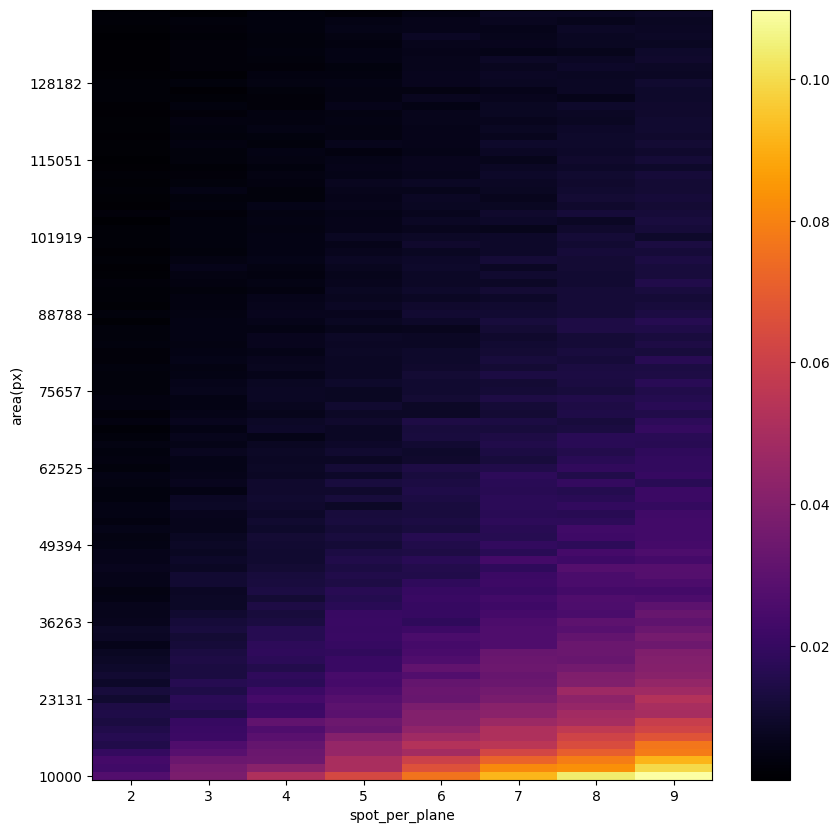

In [98]:
import matplotlib.pyplot as plt

def create_colormap_plot(df : pd.DataFrame, x_key :str, y_key : str, value_col : str) :
    df['area'] = df['area'].round().astype(int)
    df = df.pivot(columns=x_key, index=y_key,  values=value_col)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    
    
    
    mesh = ax.pcolormesh(df, cmap='inferno')
    color_bar = plt.colorbar(mesh, ax=ax)
    
    step = int(len(df) / 10)
    
    ax.set_yticks(
        np.arange(len(df))[0:len(df):step] + 0.5,
        df.index[0:len(df):step]
        )
    ax.set_ylabel('area(px)')
    
    ax.set_xticks(
        np.arange(len(df.columns)) + 0.5,
        df.columns
        )
    ax.set_xlabel('spot_per_plane')
    
    
    return fig
    
fig = create_colormap_plot(dataframe, 'spot_number', 'area', 'colocalization_rate')
folder = "/home/floric/Documents/python_dev/colocalization_simulation"
fig.savefig(folder + "/heatmap_colocalization_rate.svg")

In [99]:
from sklearn.linear_model import LinearRegression


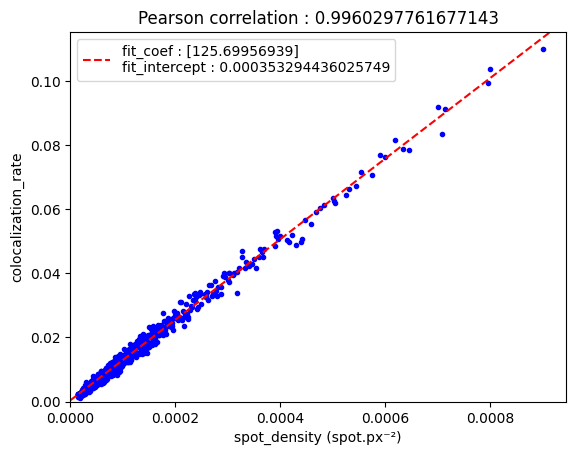

In [100]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression().fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure()
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

xmin,xmax,ymin,ymax = plt.axis()

ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")
ax.legend()
fig.savefig(folder + "/correlation_colocalization_rate_vs_spot_density.svg")


This should tell us the probability that 1 molecule randomly co-localize with a distribution of molecule of density X
Now if we want to know what proportion of a poulation we can expect to randomly co-localize with a distribution of molecule of density X we should use this law and draw a binomial probability

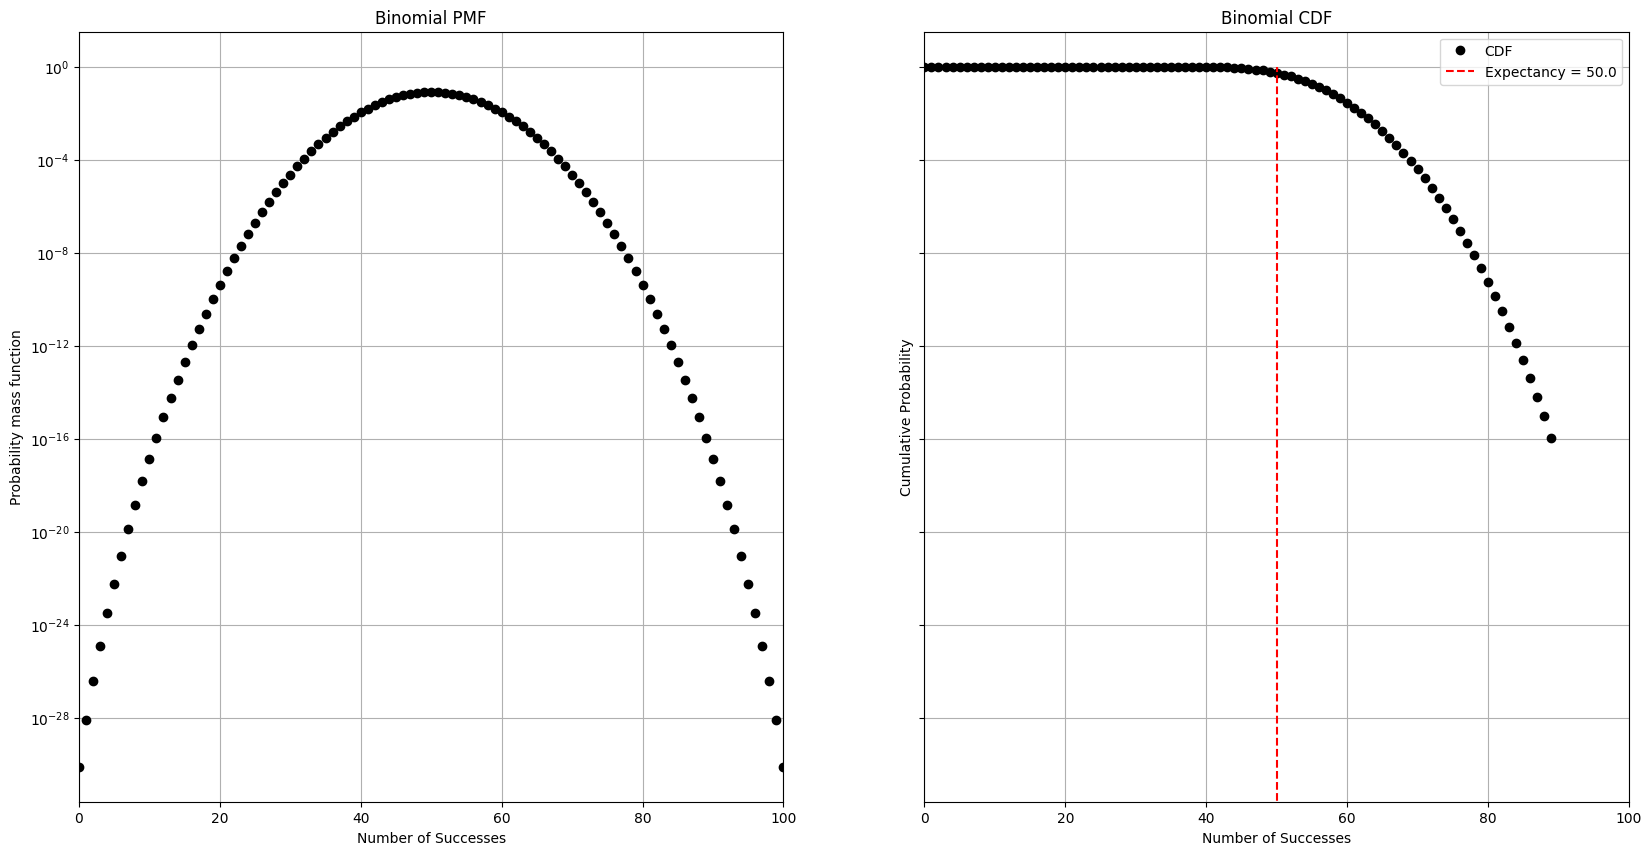

In [101]:
from scipy.stats import binom
import numpy as np

p = 0.5
population_size = 100
expectancy = p * population_size
x = np.arange(population_size +1 )

cdf = binom.cdf(x -1,population_size, p)
pmf = binom.pmf(x,population_size, p)

fig = plt.figure(figsize=(20,10))
left,right = fig.subplots(1,2, sharey=True)

plt.subplot(1,2,1)
plt.plot(x, pmf, 'ok', label='CDF')
plt.xlabel('Number of Successes')
plt.ylabel('Probability mass function')
plt.title('Binomial PMF')

# Plot CDF
plt.subplot(1,2,2)
plt.plot(x, 1-cdf, 'ok', label='CDF')
plt.plot([expectancy,expectancy], [0,1], '--r', label=f'Expectancy = {expectancy}')
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.title('Binomial CDF')

right.legend()

# left.set_ylim(0,1)
left.set_xlim(0, population_size)
right.set_xlim(0, population_size)
left.grid(True)
right.grid(True)
left.set_yscale('log')

fig.savefig(folder + "/bionmial_law_p_10")

# Load data

In [102]:
import pandas as pd
from Sequential_Fish.tools import safe_merge_no_duplicates
from Sequential_Fish.analysis.post_processing import RNA_filtering, Spots_filtering

# RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-07 - SeqFISH_Run6 - HeLa_R2TP1-2"
RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-12 - SeqFISH - HeLa - Puro - R2TP1-2_Run7"
# RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2"
# RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-02 - SeqFISH_Run9 - HeLa _POLR2"
# RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-09 - SeqFISH_Run10 - HeLa-Puro_POLR2" 


In [103]:
Acquisition = pd.read_feather(RUN_PATH + "/result_tables/Acquisition.feather")
Detection = pd.read_feather(RUN_PATH + "/result_tables/Detection.feather")
Spots = pd.read_feather(RUN_PATH + "/result_tables/Spots.feather")
Gene_map = pd.read_feather(RUN_PATH + "/result_tables/Gene_map.feather")
Cell = pd.read_feather(RUN_PATH + "/result_tables/Cell.feather")

COLOCALISATION_DISTANCE = 400


In [104]:
Detection = safe_merge_no_duplicates(
    Detection,
    Acquisition,
    on= ['acquisition_id'],
    keys=['cycle','location', 'fish_reodered_shape']
)

Detection = safe_merge_no_duplicates(
    Detection,
    Gene_map,
    on= ['cycle','color_id'],
    keys=['target']
)

Spots =safe_merge_no_duplicates(
    Spots,
    Detection,
    on= 'detection_id',
    keys= ['location','target', 'voxel_size', 'fish_reodered_shape']
)


Spots

/home/floric/miniconda3/envs/dev/lib/python3.8/site-packages/Sequential_Fish/tools/utils.py:154: UserWarning: location already in left dataframe columns, location was removed from columns to merge.
  warnings.warn(f"{key} already in left dataframe columns, {key} was removed from columns to merge.")


,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id,drift_z,...,cycle,color_id,is_washout,coordinates,in_nucleus,cell_label,location,target,voxel_size,fish_reodered_shape
0,0,NaN,5,93,1600,8120,free,1,0,0,...,0,0,False,"[5, 93, 1600]",True,1.0,Location-01,POLR2A,"[200, 97, 97]","[56, 1981, 2004, 3]"
1,1,NaN,5,123,1625,8751,free,1,0,0,...,0,0,False,"[5, 123, 1625]",True,1.0,Location-01,POLR2A,"[200, 97, 97]","[56, 1981, 2004, 3]"
2,2,NaN,5,128,1634,8427,free,1,0,0,...,0,0,False,"[5, 128, 1634]",True,1.0,Location-01,POLR2A,"[200, 97, 97]","[56, 1981, 2004, 3]"
3,3,NaN,5,141,610,8403,free,1,0,0,...,0,0,False,"[5, 141, 610]",True,4.0,Location-01,POLR2A,"[200, 97, 97]","[56, 1981, 2004, 3]"
4,4,NaN,5,157,1650,8633,free,1,0,0,...,0,0,False,"[5, 157, 1650]",True,1.0,Location-01,POLR2A,"[200, 97, 97]","[56, 1981, 2004, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374065,229359,NaN,37,301,290,4426,free,140,121,0,...,13,1,True,"[37, 301, 290]",False,0.0,Location-05,Washout_13_1,"[200, 97, 97]","[56, 1981, 2004, 3]"
374066,229360,NaN,14,1902,1854,4059,free,140,121,0,...,13,1,True,"[14, 1902, 1854]",False,0.0,Location-05,Washout_13_1,"[200, 97, 97]","[56, 1981, 2004, 3]"
374067,264241,NaN,15,1549,595,7244,free,168,122,0,...,13,1,True,"[15, 1549, 595]",False,32.0,Location-06,Washout_13_1,"[200, 97, 97]","[56, 1981, 2004, 3]"
374068,312150,NaN,17,505,864,6322,free,196,123,0,...,13,1,True,"[17, 505, 864]",True,11.0,Location-07,Washout_13_1,"[200, 97, 97]","[61, 1981, 2004, 3]"


In [105]:
Spots = RNA_filtering(Spots)
Spots = Spots_filtering(Spots, Detection=Detection, Cell=Cell)
Spots = Spots.loc[~Spots['target'].str.contains('Washout')]
Spots = Spots.loc[~Spots['target'].isin(['POLR2A_20', "POLR2A_16"])]
Spots

,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id_x,drift_z,...,nucleus_mip_min_signal,nucleus_mip_median_signal,nucleus_mean_mean_signal,nucleus_mean_max_signal,nucleus_mean_min_signal,nucleus_mean_median_signal,acquisition_id_y,cluster_number,rna_number,cell_id
0,0,NaN,5,93,1600,8120,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
1,1,NaN,5,123,1625,8751,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
2,2,NaN,5,128,1634,8427,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
3,4,NaN,5,157,1650,8633,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
4,76,NaN,6,176,1611,8176,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316788,374055,NaN,41,1830,1314,3942,free,251,116,0,...,10783,23311.0,19101.866150,24897,9827,19651.0,116,0,6,319
316789,373818,NaN,6,59,665,6802,free,251,116,0,...,32043,65535.0,35594.844137,42289,24520,36362.0,116,0,4,302
316790,373819,NaN,8,60,665,6345,free,251,116,0,...,32043,65535.0,35594.844137,42289,24520,36362.0,116,0,4,302
316791,373957,NaN,34,127,680,5736,free,251,116,0,...,32043,65535.0,35594.844137,42289,24520,36362.0,116,0,4,302


## Rename

In [106]:
rule = {
    'POLR2A₀' : 'POLR2A', 
    'POLR2A_0' : 'POLR2A',
    'POLR2B_0' : 'POLR2B',
}
Spots['target'] = Spots['target'].replace(rule)

# NearestNeighbours

In [107]:
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm #loading bar
import numpy as np

#We test colocalisation of population 1 with population 2, ie population 2 is used to fit neighbours model
POPULATION_1 = 'all'
POPULATION_2 = 'all'

In [108]:
Spots

,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id_x,drift_z,...,nucleus_mip_min_signal,nucleus_mip_median_signal,nucleus_mean_mean_signal,nucleus_mean_max_signal,nucleus_mean_min_signal,nucleus_mean_median_signal,acquisition_id_y,cluster_number,rna_number,cell_id
0,0,NaN,5,93,1600,8120,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
1,1,NaN,5,123,1625,8751,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
2,2,NaN,5,128,1634,8427,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
3,4,NaN,5,157,1650,8633,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
4,76,NaN,6,176,1611,8176,free,1,0,0,...,9198,20984.0,17356.169854,22973,8024,17885.0,0,7,168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316788,374055,NaN,41,1830,1314,3942,free,251,116,0,...,10783,23311.0,19101.866150,24897,9827,19651.0,116,0,6,319
316789,373818,NaN,6,59,665,6802,free,251,116,0,...,32043,65535.0,35594.844137,42289,24520,36362.0,116,0,4,302
316790,373819,NaN,8,60,665,6345,free,251,116,0,...,32043,65535.0,35594.844137,42289,24520,36362.0,116,0,4,302
316791,373957,NaN,34,127,680,5736,free,251,116,0,...,32043,65535.0,35594.844137,42289,24520,36362.0,116,0,4,302


In [109]:
def check_unique(df: pd.DataFrame, key :str) :
    
    if df[key].dtype == object :
        df[key] = df[key].apply(tuple)
    
    assert len(df[key].unique()) == 1, f"{key} is not unique for dataframe. \n{df[key].unique()}"

In [110]:
def get_population_index(Spots : pd.DataFrame, population_key:str) :
    """
    get index from Spots data frame to a population : 'all', 'clustered', 'free'
    """
    if population_key == 'all' : population_index = Spots.index
    elif population_key == 'clustered' : population_index = Spots.loc[~Spots['cluster_id'].isna()].index
    elif population_key == 'cluster' : population_index = Spots.loc[~Spots['cluster_id'].isna()].index
    elif population_key == 'clustes' : population_index = Spots.loc[~Spots['cluster_id'].isna()].index
    elif population_key == 'free' : population_index = Spots.loc[Spots['cluster_id'].isna()].index
    else : raise AssertionError("{} incorect key for population_key".format(population_key))

    return population_index

In [111]:
def create_coordinate_df(Spots : pd.DataFrame, population_key:str) :
    
    population_index = get_population_index(Spots, population_key)
    coordinates_df = Spots.loc[population_index]

    #converting pixel coordinates to nanometers
    coordinates_df['voxel_size_z'], coordinates_df['voxel_size_y'], coordinates_df['voxel_size_x'] = list(zip(*coordinates_df['voxel_size']))
    coordinates_df['z'] *= coordinates_df['voxel_size_z'] 
    coordinates_df['y'] *= coordinates_df['voxel_size_y'] 
    coordinates_df['x'] *= coordinates_df['voxel_size_x'] 

    coordinates_df['coordinates'] = list(zip(coordinates_df['z'], coordinates_df['y'], coordinates_df['x']))
    coordinates_df = coordinates_df.groupby(['location','target'])['coordinates'].apply(list)
    return coordinates_df

In [112]:
def create_neihbor_model_dict(spots_coordinates_df, colocalisation_distance) :
    neighbor_models_dict = dict()
    for idx in tqdm(spots_coordinates_df.index, desc= "Fitting nearest neighbors models") :
        spot_distribution = spots_coordinates_df.at[idx]
        new_model = NearestNeighbors(radius=colocalisation_distance)
        new_model.fit(spot_distribution)
        neighbor_models_dict[idx] = new_model
        
    return neighbor_models_dict

In [ ]:
def compute_colocalisation_truth_df(
    spots_coordinates_df : pd.DataFrame, 
    Spots : pd.DataFrame, 
    neighbor_models_dict : dict
    ) :
    
    population1_index = get_population_index(Spots, population_key=POPULATION_1)
    RNAs = list(spots_coordinates_df.index.get_level_values(1).unique())
    colocalisation_truth_df = pd.DataFrame(index=population1_index, columns= RNAs, dtype=bool)
    colocalisation_truth_df = colocalisation_truth_df.join(Spots.loc[:,['spot_id','location','target', 'z','y','x','voxel_size']])

    #converting coordinates to nanometers
    colocalisation_truth_df['voxel_size_z'], colocalisation_truth_df['voxel_size_y'], colocalisation_truth_df['voxel_size_x'] = list(zip(*colocalisation_truth_df['voxel_size']))
    colocalisation_truth_df['z'] *= colocalisation_truth_df['voxel_size_z'] 
    colocalisation_truth_df['y'] *= colocalisation_truth_df['voxel_size_y'] 
    colocalisation_truth_df['x'] *= colocalisation_truth_df['voxel_size_x'] 
    colocalisation_truth_df['coordinates'] = list(zip(colocalisation_truth_df['z'], colocalisation_truth_df['y'], colocalisation_truth_df['x']))

    colocalisation_truth_df = colocalisation_truth_df.drop(columns=['z','y','x','voxel_size','voxel_size_z','voxel_size_y','voxel_size_x'])
    
    for location in tqdm(colocalisation_truth_df['location'].unique(), desc= "computing co-localizations") :
        target_idx = colocalisation_truth_df[colocalisation_truth_df['location'] == location].index
        for rna in RNAs :
            model : NearestNeighbors = neighbor_models_dict[(location, rna)]
            coordinates = list(colocalisation_truth_df.loc[target_idx]['coordinates'].apply(np.array,dtype=int))
            coordinates = np.array(coordinates, dtype=int)
            query = model.radius_neighbors(coordinates, return_distance=False)
            query = pd.Series(query, index=target_idx).apply(len).apply(bool) #if count is 0 no colocalisation -> False else True
            colocalisation_truth_df.loc[target_idx,[rna]] = query
    
    return colocalisation_truth_df

In [ ]:
def colocalisation_truth_df(
    Spots : pd.DataFrame,
    population_1 = 'all',
    population_2 = 'all',
    colocalisation_distance = 400,
) :
    
    population_1_index = get_population_index(Spots, population_key=population_1)
    
    real_spots_coordinates_df = create_coordinate_df(Spots, population_key= population_2)
    
    neighbor_models_dict = create_neihbor_model_dict(real_spots_coordinates_df, colocalisation_distance=colocalisation_distance)
    colocalisation_truth_df = compute_colocalisation_truth_df(real_spots_coordinates_df, Spots.loc[population_1_index], neighbor_models_dict)
    
    return colocalisation_truth_df

In [115]:
colocalisation_truth_df = colocalisation_truth_df(
    Spots,
    population_1= POPULATION_1,
    population_2= POPULATION_2,
    colocalisation_distance=COLOCALISATION_DISTANCE
)
colocalisation_truth_df

computing co-localizations: 100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


,AGO1,AGO2,CHERD,EP400,GTF3C1,INO80,PCF11,POLR1A,POLR2A,POLR2B,POLR3A,SCAF4,SCAF8,SRCAP,spot_id,location,target,coordinates
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,Location-01,POLR2A,"(1000, 9021, 155200)"
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,Location-01,POLR2A,"(1000, 11931, 157625)"
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,2,Location-01,POLR2A,"(1000, 12416, 158498)"
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False,4,Location-01,POLR2A,"(1000, 15229, 160050)"
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,76,Location-01,POLR2A,"(1200, 17072, 156267)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316788,True,False,False,False,False,False,False,False,False,False,False,False,False,False,374055,Location-10,AGO1,"(8200, 177510, 127458)"
316789,True,False,False,False,False,False,False,False,False,False,False,False,False,False,373818,Location-10,AGO1,"(1200, 5723, 64505)"
316790,True,True,False,False,False,False,False,False,False,False,False,False,False,False,373819,Location-10,AGO1,"(1600, 5820, 64505)"
316791,True,False,False,False,False,False,False,False,False,False,False,False,False,False,373957,Location-10,AGO1,"(6800, 12319, 65960)"


# Colocalization rates

In [116]:
def create_global_coloc_rates_df(Spots, colocalisation_truth_df) :
    RNA_list = list(Spots['target'].unique())
    RNA_list.sort()
    coloc_rates_df = pd.DataFrame(columns=RNA_list, index= RNA_list)

    for target in RNA_list :
        data = colocalisation_truth_df.loc[colocalisation_truth_df['target'] == target, RNA_list]
        spots_number = len(data)
        data = data.sum(axis=0)/spots_number*100
        coloc_rates_df[target] = data

    return coloc_rates_df

In [117]:
coloc_rates_df = create_global_coloc_rates_df(Spots, colocalisation_truth_df)
coloc_rates_df

,AGO1,AGO2,CHERD,EP400,GTF3C1,INO80,PCF11,POLR1A,POLR2A,POLR2B,POLR3A,SCAF4,SCAF8,SRCAP
AGO1,100.000000,2.478946,0.615717,5.355249,1.559502,4.868297,0.454950,1.080830,0.246212,0.230483,0.987213,0.470940,1.258070,4.388346
AGO2,6.660584,100.000000,0.780222,7.277306,2.755946,1.701160,2.986846,2.586035,0.913481,0.759411,0.987213,1.370702,1.390498,1.963446
CHERD,1.961679,0.794595,100.000000,1.855779,0.899396,1.324867,1.997824,1.312910,0.958679,1.072632,3.826627,1.520025,6.836616,1.547231
EP400,6.261405,2.654994,0.587516,100.000000,4.201993,3.425839,5.172584,5.152178,0.729120,0.224573,1.100038,2.504020,1.887105,3.854506
GTF3C1,7.470347,3.939668,1.786050,20.453340,100.000000,5.377861,5.528632,6.040713,2.067226,1.427221,2.228281,3.526304,2.996193,5.428882
INO80,8.941606,1.284674,1.222034,7.621951,1.786414,100.000000,0.791217,1.326172,0.415110,0.469830,2.209477,0.746612,2.780997,5.365545
PCF11,0.536040,1.389351,1.367738,9.345175,1.875116,0.807463,100.000000,5.191963,0.915860,0.564387,4.202708,2.262807,6.174474,0.705755
POLR1A,2.235401,1.498787,1.344238,10.007953,2.524909,1.332706,5.597864,100.000000,1.332160,0.794870,3.892441,1.964163,3.509353,2.035831
POLR2A,2.452099,3.482895,4.032713,9.689820,4.179302,2.947632,7.130848,8.500763,100.000000,3.531115,4.926664,3.350180,4.005959,3.818313
POLR2B,0.946624,1.122901,2.124459,1.153234,1.082988,1.450298,2.334092,1.922949,1.429693,100.000000,5.020684,1.133318,4.370137,1.474846


**This table is generated by creating a co-localization global per rna. Which is difficult to normalise because expected random co-localization depends on (cell_size, rna_number)**

Lets create for each couple of RNA a list of co-localization rates with one element per cell from which we can get average and std.

In [134]:
RNA_list = list(Spots['target'].unique())
RNA_list.sort()
colocalisation_truth_df= safe_merge_no_duplicates(
    colocalisation_truth_df,
    Spots,
    on='spot_id',
    keys='cell_id'
)

agg_dict = {rna : list for rna in RNA_list}

cell_coloc_rates = colocalisation_truth_df.groupby(['target','cell_id'])[RNA_list].mean() #Normalisation needs to happen after this
cell_coloc_rates

/home/floric/miniconda3/envs/dev/lib/python3.8/site-packages/Sequential_Fish/tools/utils.py:154: UserWarning: cell_id already in left dataframe columns, cell_id was removed from columns to merge.
  warnings.warn(f"{key} already in left dataframe columns, {key} was removed from columns to merge.")
/home/floric/miniconda3/envs/dev/lib/python3.8/site-packages/Sequential_Fish/tools/utils.py:157: UserWarning: No column to merge.
  warnings.warn("No column to merge.")


AGO1      AGO2     CHERD     EP400    GTF3C1     INO80  \
target cell_id                                                               
AGO1   0        1.000000  0.133333  0.000000  0.000000  0.000000  0.000000   
       1        1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       2        1.000000  0.000000  0.071429  0.000000  0.000000  0.000000   
       3        1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       4        1.000000  0.100000  0.000000  0.000000  0.000000  0.000000   
...                  ...       ...       ...       ...       ...       ...   
SRCAP  316      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       317      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       318      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       319      0.120000  0.040000  0.000000  0.000000  0.000000  0.120000   
       320      0.290323  0.064516  0.000000  0.225806  0.225806  0.258065   

                PCF11    POLR1A    POLR2A    POLR2B  POLR3A  SCAF4  SCAF8  \
target cell_id                                                              
AGO1   0          0.0  0.000000  0.000000  0.000000     0.0    0.0    0.0   
       1          0.0  0.062500  0.062500  0.062500     0.0    0.0    0.0   
       2          0.0  0.000000  0.000000  0.071429     0.0    0.0    0.0   
       3          0.0  0.000000  0.058824  0.058824     0.0    0.0    0.0   
       4          0.0  0.000000  0.000000  0.000000     0.0    0.0    0.0   
...               ...       ...       ...       ...     ...    ...    ...   
SRCAP  316        0.0  0.000000  0.000000  0.000000     0.0    0.0    0.0   
       317        0.0  0.000000  0.000000  0.000000     0.0    0.0    0.0   
       318        0.0  0.000000  0.000000  0.000000     0.0    0.0    0.0   
       319        0.0  0.000000  0.000000  0.000000     0.0    0.0    0.0   
       320        0.0  0.225806  0.096774  0.161290     0.0    0.0    0.0   

                SRCAP  
target cell_id         
AGO1   0          0.0  
       1          0.0  
       2          0.0  
       3          0.0  
       4          0.0  
...               ...  
SRCAP  316        1.0  
       317        1.0  
       318        1.0  
       319        1.0  
       320        1.0  

[4493 rows x 14 columns]

In [119]:
def get_linear_coefficient():
    """
    TODO : get the linear coef linking colocalization rate of a single molecule to spot_density of cell.
    """
    pass

linear_coefficient = 123.99 # for voxel_size = (200,97,97) nm and colocalization_distance = 400nm

In [135]:
Cell_area = Cell.groupby('cell_id',as_index=True)['cell_area'].first()
# Cell_area = Cell_area.set_index('cell_id', verify_integrity=True)

Cell_spots_count : pd.DataFrame = Spots.groupby(['cell_id','target','z'], as_index=False)['spot_id'].count()
Cell_spots_count : pd.DataFrame = Cell_spots_count.groupby(['cell_id','target'], as_index=False)['spot_id'].mean().rename(columns={'spot_id' : 'spot_per_plane'})
Cell_spots_count = Cell_spots_count.pivot(columns='target',index='cell_id',values='spot_per_plane')

Cell_spot_density = Cell_spots_count.copy()
for rna in RNA_list :
    Cell_spot_density[rna] = Cell_spots_count[rna]/Cell_area ### TODO : I DID FUCTIONS UP TO HERE (_compute_spot_density)

Cell_single_colocalisation_probability = Cell_spot_density.copy()
Cell_single_colocalisation_probability *= linear_coefficient

cell_id_index = Cell_single_colocalisation_probability.index

Cell_single_colocalisation_probability.index = pd.MultiIndex.from_product([[RNA_list[0]], cell_id_index])
Cell_single_colocalisation_probability = Cell_single_colocalisation_probability.reindex(pd.MultiIndex.from_product([RNA_list, cell_id_index])).sort_index(level=1).fillna(method='ffill')
Cell_single_colocalisation_probability = Cell_single_colocalisation_probability.sort_index()

cell_coloc_rates = cell_coloc_rates.reindex(index=pd.MultiIndex.from_product([RNA_list, cell_id_index])).sort_index(level=1)
cell_coloc_rates.index.names = ['target','cell_id']
Cell_single_colocalisation_probability.index.names = ['target','cell_id']
cell_coloc_score = cell_coloc_rates / Cell_single_colocalisation_probability
cell_coloc_score = cell_coloc_score.groupby('target', level=0).mean()
# cell_coloc_score[cell_coloc_score.isna().any(axis=1)]
Cell_spot_density


target,AGO1,AGO2,CHERD,EP400,GTF3C1,INO80,PCF11,POLR1A,POLR2A,POLR2B,POLR3A,SCAF4,SCAF8,SRCAP
cell_id,,,,,,,,,,,,,,
0,0.000024,0.000036,0.000031,0.000025,0.000055,0.000023,0.000022,0.000028,0.000065,0.000044,0.000020,0.000036,0.000021,0.000023
1,0.000028,0.000048,0.000035,0.000023,0.000068,0.000027,0.000028,0.000030,0.000097,0.000064,0.000033,0.000048,0.000019,0.000032
2,0.000045,0.000056,0.000056,0.000042,0.000088,0.000051,0.000038,0.000047,0.000140,0.000093,0.000048,0.000065,0.000042,0.000046
3,0.000027,0.000035,0.000035,0.000029,0.000074,0.000025,0.000027,0.000034,0.000125,0.000064,0.000027,0.000040,0.000026,0.000027
4,0.000035,0.000046,0.000055,0.000035,0.000062,0.000037,0.000037,0.000037,0.000118,0.000073,0.000036,0.000074,0.000042,0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.000020,0.000043,0.000042,0.000020,0.000046,0.000030,0.000026,0.000035,0.000102,0.000072,0.000030,0.000061,0.000020,0.000020
317,0.000014,0.000023,0.000021,0.000022,0.000035,0.000025,0.000031,0.000020,0.000055,0.000041,0.000021,0.000034,0.000018,0.000016
318,0.000021,0.000026,0.000029,0.000028,0.000040,0.000029,0.000025,0.000025,0.000059,0.000049,0.000018,0.000043,0.000018,0.000018


In [121]:
cell_coloc_rates = cell_coloc_rates.groupby('target', level=0).mean()
cell_coloc_rates

,AGO1,AGO2,CHERD,EP400,GTF3C1,INO80,PCF11,POLR1A,POLR2A,POLR2B,POLR3A,SCAF4,SCAF8,SRCAP
target,,,,,,,,,,,,,,
AGO1,1.000000,0.048905,0.010458,0.029347,0.043217,0.042826,0.004419,0.012636,0.027490,0.009988,0.006361,0.009872,0.005076,0.029808
AGO2,0.020988,1.000000,0.007415,0.021794,0.033476,0.009170,0.013196,0.013956,0.035469,0.011188,0.004006,0.014760,0.003032,0.007679
CHERD,0.004225,0.006790,1.000000,0.004470,0.016788,0.008519,0.009442,0.010150,0.036602,0.018195,0.015304,0.016395,0.011157,0.007123
EP400,0.031332,0.064050,0.012392,1.000000,0.160287,0.043506,0.078579,0.082136,0.080236,0.013208,0.007691,0.081884,0.006291,0.024178
GTF3C1,0.014269,0.026192,0.008689,0.037898,1.000000,0.015353,0.019084,0.024441,0.041077,0.010776,0.003508,0.022972,0.003750,0.014882
INO80,0.032087,0.013823,0.011094,0.023569,0.040805,1.000000,0.005418,0.010922,0.029422,0.013585,0.012036,0.009828,0.004758,0.032477
PCF11,0.004193,0.030937,0.017059,0.050249,0.056599,0.007082,1.000000,0.053657,0.072712,0.023290,0.020663,0.058092,0.016509,0.007119
POLR1A,0.009163,0.024420,0.011974,0.044547,0.054245,0.009713,0.045009,1.000000,0.081246,0.018018,0.015446,0.039055,0.006854,0.011357
POLR2A,0.002414,0.009082,0.009480,0.007463,0.020672,0.004038,0.009451,0.013684,1.000000,0.013944,0.004708,0.009958,0.002796,0.004892


## Plots

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm, Normalize, AsinhNorm

In [ ]:
def score_color_scale() :
    colors = [
        (0,'#7d80fc'),
        (0.1,'gray'),
        (0.2,'yellow'),
        (0.5,'orange'),
        (1.0,'red'),
        ]
    
    
    colormap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    return colormap
    
def fraction_color_scale() :
    colors = [
        (0,'#7d80fc'),
        (1/10,'gray'),
        # (0.2,'yellow'),
        (0.5,'orange'),
        (1.0,'red'),
        ]
    
    
    colormap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    return colormap
    

In [124]:
def plot_heatmap(data : pd.DataFrame, vmin, vmax, cmap=None, ax= None, log=False) :
    
    if ax is None :
        fig = plt.figure(figsize=(12,10))
        ax = fig.gca()
    ax.invert_yaxis()
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    
    if cmap is None : 
        cmap = 'inferno'
    
    if log : 
        norm = LogNorm(vmin=vmin, vmax=vmax)
    else :
        norm = AsinhNorm(vmin=vmin, vmax=vmax, linear_width=1/10)
    
    colormesh = ax.pcolormesh(
        data,
        norm=norm,
        cmap=cmap,
        edgecolor = 'white',
        )

    x_pos = np.arange(len(data.columns)) + 0.5
    y_pos = np.arange(len(data.index)) + 0.5
    ax.set_xticks(x_pos, data.columns, rotation = 30)
    ax.set_yticks(y_pos, data.index)

    cbar = plt.colorbar(colormesh, ax=ax)
        
    if ax is None :
        return fig
    else :
        return ax
    

,AGO1,AGO2,CHERD,EP400,GTF3C1,INO80,PCF11,POLR1A,POLR2A,POLR2B,POLR3A,SCAF4,SCAF8,SRCAP
target,,,,,,,,,,,,,,
AGO1,1.000000,0.048905,0.010458,0.029347,0.043217,0.042826,0.004419,0.012636,0.027490,0.009988,0.006361,0.009872,0.005076,0.029808
AGO2,0.020988,1.000000,0.007415,0.021794,0.033476,0.009170,0.013196,0.013956,0.035469,0.011188,0.004006,0.014760,0.003032,0.007679
CHERD,0.004225,0.006790,1.000000,0.004470,0.016788,0.008519,0.009442,0.010150,0.036602,0.018195,0.015304,0.016395,0.011157,0.007123
EP400,0.031332,0.064050,0.012392,1.000000,0.160287,0.043506,0.078579,0.082136,0.080236,0.013208,0.007691,0.081884,0.006291,0.024178
GTF3C1,0.014269,0.026192,0.008689,0.037898,1.000000,0.015353,0.019084,0.024441,0.041077,0.010776,0.003508,0.022972,0.003750,0.014882
INO80,0.032087,0.013823,0.011094,0.023569,0.040805,1.000000,0.005418,0.010922,0.029422,0.013585,0.012036,0.009828,0.004758,0.032477
PCF11,0.004193,0.030937,0.017059,0.050249,0.056599,0.007082,1.000000,0.053657,0.072712,0.023290,0.020663,0.058092,0.016509,0.007119
POLR1A,0.009163,0.024420,0.011974,0.044547,0.054245,0.009713,0.045009,1.000000,0.081246,0.018018,0.015446,0.039055,0.006854,0.011357
POLR2A,0.002414,0.009082,0.009480,0.007463,0.020672,0.004038,0.009451,0.013684,1.000000,0.013944,0.004708,0.009958,0.002796,0.004892


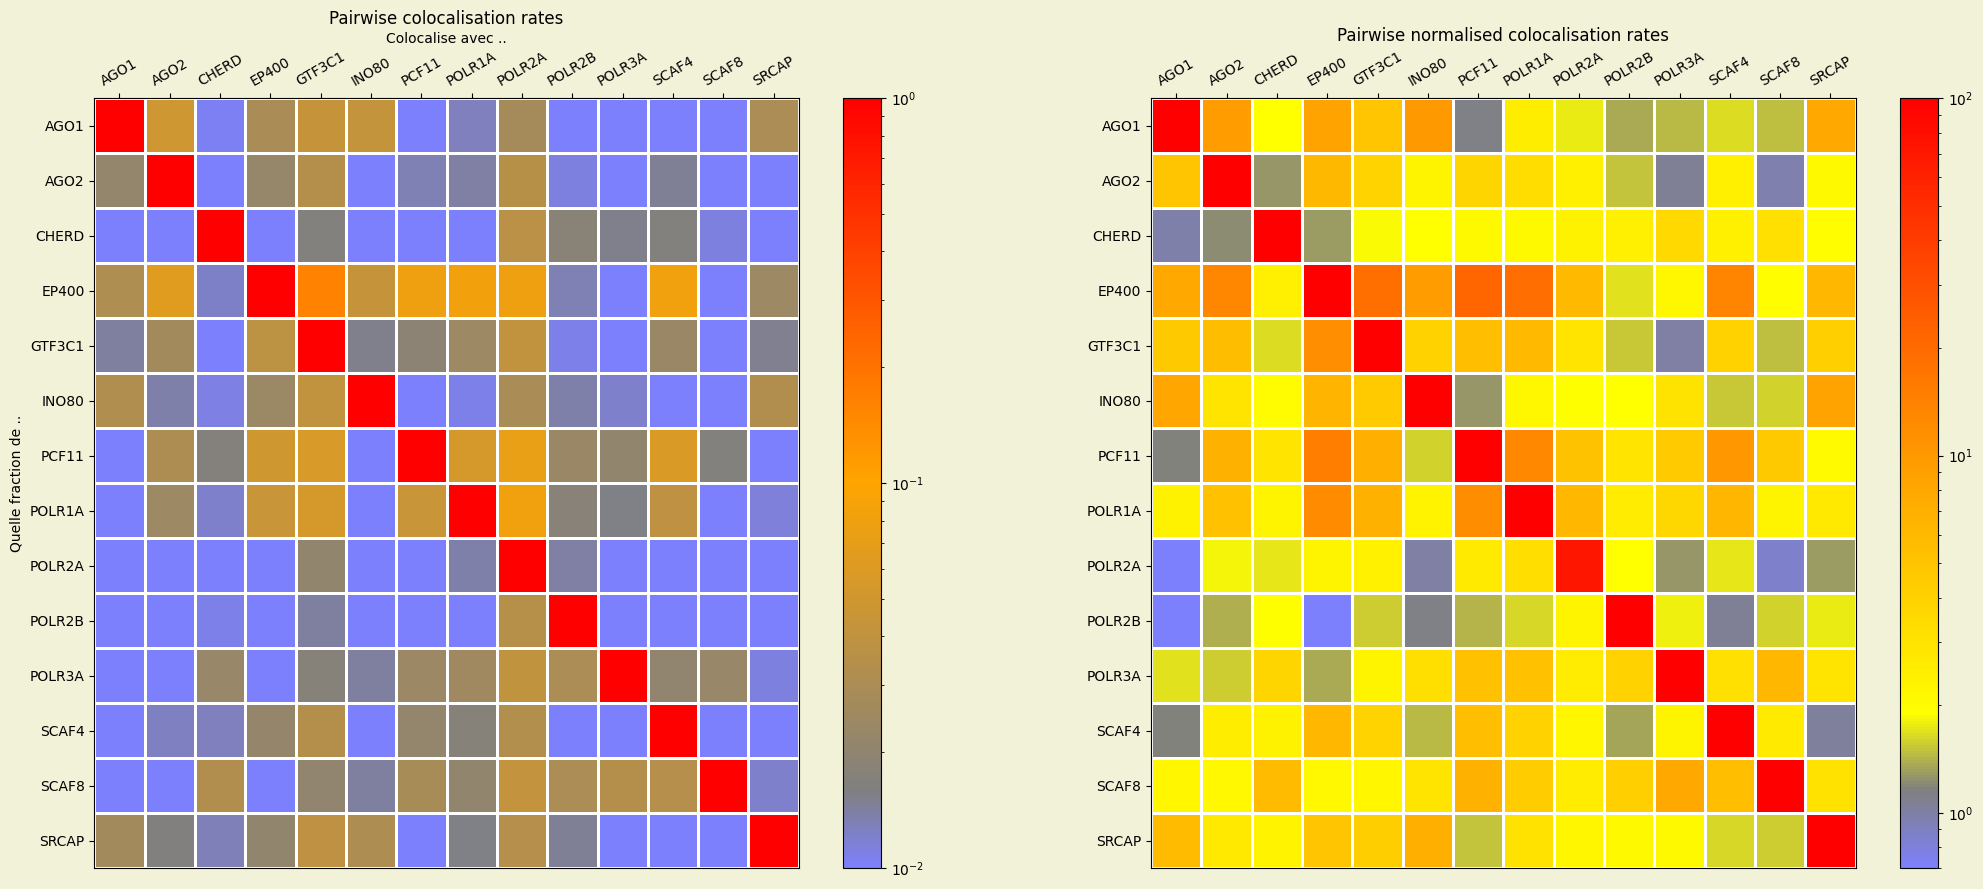

In [125]:
pariwise_coloc_fig = plt.figure(figsize=(25,10), facecolor=(0.95,0.95,0.85), edgecolor='black')
left,right = pariwise_coloc_fig.subplots(1,2)

left = plot_heatmap(cell_coloc_rates, vmin=1e-2, vmax=1, ax=left, cmap= fraction_color_scale(), log=True)
right = plot_heatmap(cell_coloc_score, vmin= 0.7, vmax=100, ax=right, cmap=score_color_scale(), log=True)

left.set_ylabel('Quelle fraction de ..')
left.set_title('Pairwise colocalisation rates')
left.set_xlabel('Colocalise avec ..')
right.set_title('Pairwise normalised colocalisation rates')

cell_coloc_rates

In [126]:
cell_coloc_score

,AGO1,AGO2,CHERD,EP400,GTF3C1,INO80,PCF11,POLR1A,POLR2A,POLR2B,POLR3A,SCAF4,SCAF8,SRCAP
target,,,,,,,,,,,,,,
AGO1,310.756791,9.409456,1.897528,8.652034,4.921207,10.063473,1.136305,2.538353,1.773714,1.378467,1.445586,1.664425,1.466544,7.873944
AGO2,4.863008,207.231825,1.256317,6.034602,3.889252,2.271019,3.809099,3.341309,2.423251,1.508132,1.058952,2.454334,0.962693,2.110036
CHERD,0.975843,1.224444,194.960765,1.291513,1.861685,1.900954,2.092618,2.101758,2.362683,2.504290,3.545616,2.464933,3.170536,1.970277
EP400,7.910699,13.147338,2.488106,320.635845,18.623241,9.555243,21.574682,18.984816,5.970631,1.700155,2.191644,13.433178,1.990923,6.155966
GTF3C1,4.648067,5.583448,1.652038,11.692986,119.656800,3.955926,5.500420,5.978883,2.989739,1.532525,1.003721,3.997150,1.464997,4.213743
INO80,8.201407,2.938843,2.031225,6.418911,4.546001,261.297563,1.257066,2.183222,1.925928,1.894315,3.004567,1.540849,1.598472,8.584071
PCF11,1.164026,6.839498,2.980918,14.992314,7.121333,1.609881,300.023053,13.013533,5.251820,2.995125,4.492820,10.275408,4.660530,2.041596
POLR1A,2.363145,5.287362,2.265411,12.294204,6.808912,2.319516,11.958897,242.631172,6.228858,2.567423,3.694345,6.342913,2.274491,2.767252
POLR2A,0.703602,1.811273,1.715512,2.251772,2.410629,1.003536,2.670276,3.241610,70.883975,1.901998,1.260914,1.717643,0.860629,1.300424


## save table

In [127]:
import os
table_save_path =  "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_RT2P/pairwise-colocalization/"
experiment_name = os.path.basename(RUN_PATH)
os.makedirs(table_save_path, exist_ok=True)
pariwise_coloc_fig.savefig(f"{table_save_path}/{experiment_name}_heatmap.svg")
cell_coloc_score.to_excel(f"{table_save_path}/{experiment_name}_Normalised_coloc_rates.xlsx")
cell_coloc_rates.to_excel(f"{table_save_path}/{experiment_name}_Coloc_rates.xlsx")
